Name:   Subrat Kishore Dutta
Matrikelnummer:  7028082
Email:   subratkishoredutta1234@gmail.com,sudu00001@stud.uni-saarland.de
   
Name:   Prathvish Mithare
Matrikelnummer:   7028692
Email:prmi00001@stud.uni-saarland.de

#### Preamble

In [1]:
# TODO: Import necessary libraries
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import solution as sol
import matplotlib.pyplot as plt
from torchmetrics import F1Score

In [2]:
torch.cuda.is_available()
device =  torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
print(device)

cuda:0


In [4]:
###Helper function
#calculating loss over a dataset
def test(model,test_loader):
        loss_fn = nn.CrossEntropyLoss()
        loss=0
        for i,(xs,ys) in enumerate(test_loader):
            xs=xs.to(device)
            ys=ys.to(device)
            pred = model(xs)
            loss+= loss_fn(pred,ys).item()
        print(loss/len(test_loader))
##function to get accuracy:
def get_accuracy(data,model):
    accdata=data
    train_acc=0
    i=0
    for X,Y in accdata:
        i+=len(X)
        X=X.to(device)
        Y=Y.to(device)
        ypred=model(X)
        train_acc += torch.sum(ypred.argmax(1) == Y)
    accuracy = train_acc/i
    
    print(accuracy.item()*100,"%")
def get_f1(data,model):
    accdata=data
    for X,Y in accdata:
        X=X.to(device)
        Y=Y.to(device)
        f1= F1Score(task="multiclass", num_classes=10).to(device)
        ypred=model(X)
        f1 = f1(ypred.argmax(1),Y)
    print("F1 score:",f1.item())
def plot(par,lossrec,model):
    fig, axs = plt.subplots(1,2,figsize=(20,7))
    axs[0].set_title('epoch vs log loss')
    axs[0].plot(range(len(lossrec)),lossrec,color='orange',label='Training loss')
    axs[0].set_xlabel('epochs')
    axs[0].set_ylabel('log loss')
    par = [p.item() for p in par]
    axs[1].plot(range(len(par)),par,marker='o',color='violet',label='weight grad')
    axs[1].set_ylabel('norm of weights grad')
    axs[1].set_xlabel('epochs')
    axs[1].set_title('change of weight grad over epochs ')
    axs[1].legend()
    plt.show()
def plotrandomdata(data):
    for x,y in data:
        idx=[i.item() for i in torch.randint(0,128,(6,))]
        X=x[idx]
        fig,axs=plt.subplots(2,3)
        plt.suptitle('DATA')
        axs[0][0].imshow(X[0][0])
        axs[0][1].imshow(X[1][0])
        axs[0][2].imshow(X[2][0])
        axs[1][0].imshow(X[3][0])
        axs[1][1].imshow(X[4][0])
        axs[1][2].imshow(X[5][0])
        break

# 9.2 Design your CNN (4 points

Please create a ```solution.py``` file where you define the following:


1. A ```function``` where you use pytorch's Dataset and Dataloader class, and it should return you the desired split for the dataset. The function should have ```split``` as one of its argument and the call to Dataset class should respect this argument. The desired role of function is as follows:
    - Load the ```SVHN``` dataset using the built-in PyTorch datasets and data loaders.
    - Preprocess the data as needed, such as by resizing, cropping, and normalizing the images.
    - Returns the Dataloader object for specified split
    - **(Optional)** Try incorporating different transform based on whether it's **train / test / extra** ```split``` of dataset you are using. You are free to scour internet for this, but be sure to cite if you end up using someone else's code. You should also be able to explain **why** using different transform functions could be useful and what advantage your particular implementation has.
    
2. A ```class``` for your implementation of CNN which does the following:
    - Define the CNN model architecture, including the choice of layers, kernel size, and number of filters.
    - **(Optional)** treat number of layers, kernel size, filters, padding etc as arguments when you are defining your class. This would help you create different networks without having the need to edit ```solution.py``` file.
    


### Train your model(s) by importing your implementation from ```solution.py``` file in this notebook

- Define a loss function and optimizer for training the model.
- Train the model on the training data and evaluate its performance on the validation data.
- Adjust the hyper-parameters and model architecture as needed to improve performance.
- Test the different models on the test data and report the results. Do you see a relation of hyper-parameter tuning w.r.t. your design choices for the network?
- **Optionally** Briefly explain your observations from the last point. You may also want to consider evaluating the model on additional benchmarks or real-world tasks to demonstrate its performance in different settings to present during tutorials. You will receive an **additional bonus** point for this.

In [6]:
# TODO: Run your experiments and plot the results
##declaring the dataset:
train_dl = sol.datagen('train',128)
test_dl = sol.datagen('test',128)

making your data :/)
Using downloaded and verified file: ./data\train_32x32.mat
making your data :/)
Using downloaded and verified file: ./data\test_32x32.mat


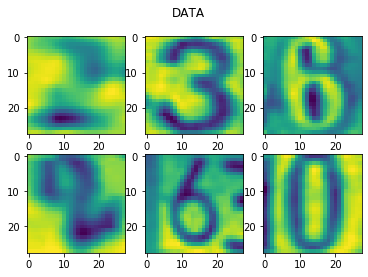

In [7]:
plotrandomdata(train_dl)

In [85]:
## setting model parameters
learning_rate = 0.001
epochs=500

In [29]:
##declaring the model
model = sol.Model(3,32,3,10,3) ## input_channel,hidden_channel,filter size,num_classes,number of layers
model.to(device)

Model(
  (layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=2048, out_features=350, bias=True)
    (14): ReLU()
    (15): Linear(in_features=350, out_features=10, bias=True)
    (16): Softmax(dim=None)
  )
)

In [70]:
Tloss=[]
Twgrad=[]

In [90]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model.parameters(),lr=learning_rate)
lossrec=[]
wgrad=[]
for epoch in range(epochs):
    tloss=0
    for i,(xs,ys) in enumerate(train_dl):
        xs=xs.to(device)
        ys=ys.to(device)
        pred = model(xs)
        loss = loss_fn(pred,ys) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss+=loss
    a=0    
    for p in model.parameters():
        a+=torch.norm(p.grad)
    wgrad.append(a)
    lossrec.append((tloss/len(train_dl)).log().item())
    print('epoch:',epoch,'loss:',(tloss/len(train_dl)).item())
Tloss+=lossrec
Twgrad+=wgrad

epoch: 0 loss: 1.6379871368408203
epoch: 1 loss: 1.6316295862197876
epoch: 2 loss: 1.6307450532913208
epoch: 3 loss: 1.6304817199707031
epoch: 4 loss: 1.6303538084030151
epoch: 5 loss: 1.6302646398544312
epoch: 6 loss: 1.630192756652832
epoch: 7 loss: 1.6301406621932983
epoch: 8 loss: 1.6300935745239258
epoch: 9 loss: 1.630051612854004
epoch: 10 loss: 1.6300103664398193
epoch: 11 loss: 1.6299766302108765
epoch: 12 loss: 1.629930019378662
epoch: 13 loss: 1.6299015283584595
epoch: 14 loss: 1.6298731565475464
epoch: 15 loss: 1.6298468112945557
epoch: 16 loss: 1.6298139095306396
epoch: 17 loss: 1.629785418510437
epoch: 18 loss: 1.6297593116760254
epoch: 19 loss: 1.6297343969345093
epoch: 20 loss: 1.6297112703323364
epoch: 21 loss: 1.6296857595443726
epoch: 22 loss: 1.6296625137329102
epoch: 23 loss: 1.6296371221542358
epoch: 24 loss: 1.6296122074127197
epoch: 25 loss: 1.6295888423919678
epoch: 26 loss: 1.6295679807662964
epoch: 27 loss: 1.6295475959777832
epoch: 28 loss: 1.6295274496078491

epoch: 459 loss: 1.6269750595092773
epoch: 460 loss: 1.6269724369049072
epoch: 461 loss: 1.6269705295562744
epoch: 462 loss: 1.6269688606262207
epoch: 463 loss: 1.6269679069519043
epoch: 464 loss: 1.6269657611846924
epoch: 465 loss: 1.6269639730453491
epoch: 466 loss: 1.6269620656967163
epoch: 467 loss: 1.6269607543945312
epoch: 468 loss: 1.6269586086273193
epoch: 469 loss: 1.6269562244415283
epoch: 470 loss: 1.6269553899765015
epoch: 471 loss: 1.6269536018371582
epoch: 472 loss: 1.626951813697815
epoch: 473 loss: 1.6269503831863403
epoch: 474 loss: 1.626948356628418
epoch: 475 loss: 1.6269464492797852
epoch: 476 loss: 1.6269450187683105
epoch: 477 loss: 1.6269437074661255
epoch: 478 loss: 1.6269423961639404
epoch: 479 loss: 1.6269404888153076
epoch: 480 loss: 1.6269389390945435
epoch: 481 loss: 1.6269372701644897
epoch: 482 loss: 1.6269352436065674
epoch: 483 loss: 1.6269334554672241
epoch: 484 loss: 1.6269320249557495
epoch: 485 loss: 1.6269304752349854
epoch: 486 loss: 1.62692821025

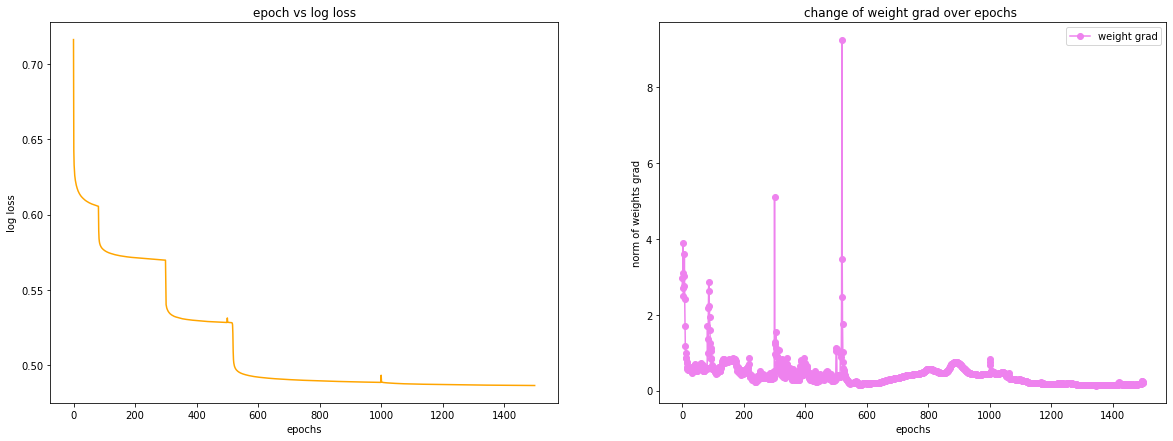

In [91]:
plot(Twgrad,Tloss,model)

In [92]:
print("Loss on test:")
test(model,test_dl)
print("Training accuracy:")
get_accuracy(train_dl,model)
print("Test accuracy:")
get_accuracy(test_dl,model)
print("Training f1 score:")
get_f1(train_dl,model)
print("Test f1 score:")
get_f1(test_dl,model)

Loss on test:
1.680564705063315
Training accuracy:
83.08830261230469 %
Test accuracy:
77.77734994888306 %
Training f1 score:
F1 score: 0.7804877758026123
Test f1 score:
F1 score: 0.875


In [28]:
model1 = sol.Model(3,64,3,10,3) ## input_channel,hidden_channel,filter size,num_classes,number of layers
model1.to(device)

Model(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=4096, out_features=350, bias=True)
    (14): ReLU()
    (15): Linear(in_features=350, out_features=10, bias=True)
    (16): Softmax(dim=None)
  )
)

In [121]:
learning_rate = 0.0001
epochs=500

In [109]:
Tloss1=[]
Twgrad1=[]

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adagrad(model1.parameters(),lr=learning_rate)
lossrec=[]
wgrad=[]
for epoch in range(epochs):
    tloss=0
    for i,(xs,ys) in enumerate(train_dl):
        xs=xs.to(device)
        ys=ys.to(device)
        pred = model1(xs)
        loss = loss_fn(pred,ys) 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss+=loss
    a=0    
    for p in model1.parameters():
        a+=torch.norm(p.grad)
    wgrad.append(a)
    lossrec.append((tloss/len(train_dl)).log().item())
    print('epoch:',epoch,'loss:',(tloss/len(train_dl)).item())
Tloss1+=lossrec
Twgrad1+=wgrad

epoch: 0 loss: 1.5663015842437744
epoch: 1 loss: 1.5662682056427002
epoch: 2 loss: 1.5662503242492676
epoch: 3 loss: 1.5662435293197632
epoch: 4 loss: 1.5662407875061035
epoch: 5 loss: 1.566237449645996
epoch: 6 loss: 1.566235065460205
epoch: 7 loss: 1.5662329196929932
epoch: 8 loss: 1.5662318468093872
epoch: 9 loss: 1.5662305355072021
epoch: 10 loss: 1.5662294626235962
epoch: 11 loss: 1.5662280321121216
epoch: 12 loss: 1.5662263631820679
epoch: 13 loss: 1.5662254095077515
epoch: 14 loss: 1.5662238597869873
epoch: 15 loss: 1.5662236213684082
epoch: 16 loss: 1.5662224292755127
epoch: 17 loss: 1.5662215948104858
epoch: 18 loss: 1.5662200450897217
epoch: 19 loss: 1.5662195682525635
epoch: 20 loss: 1.5662181377410889
epoch: 21 loss: 1.566217064857483
epoch: 22 loss: 1.5662119388580322
epoch: 23 loss: 1.5662038326263428
epoch: 24 loss: 1.5662018060684204
epoch: 25 loss: 1.566199541091919
epoch: 26 loss: 1.5661978721618652
epoch: 27 loss: 1.5661962032318115
epoch: 28 loss: 1.5661945343017578

epoch: 461 loss: 1.5660184621810913
epoch: 462 loss: 1.5660184621810913
epoch: 463 loss: 1.5660182237625122
epoch: 464 loss: 1.5660181045532227
epoch: 465 loss: 1.5660181045532227
epoch: 466 loss: 1.5660178661346436
epoch: 467 loss: 1.5660176277160645
epoch: 468 loss: 1.5660173892974854
epoch: 469 loss: 1.5660172700881958
epoch: 470 loss: 1.5660169124603271
epoch: 471 loss: 1.5660167932510376
epoch: 472 loss: 1.5660163164138794
epoch: 473 loss: 1.5660154819488525
epoch: 474 loss: 1.5660147666931152
epoch: 475 loss: 1.5660138130187988
epoch: 476 loss: 1.5660127401351929
epoch: 477 loss: 1.566011667251587
epoch: 478 loss: 1.5660104751586914
epoch: 479 loss: 1.5660096406936646
epoch: 480 loss: 1.5660089254379272
epoch: 481 loss: 1.5660085678100586
epoch: 482 loss: 1.5660078525543213
epoch: 483 loss: 1.5660077333450317
epoch: 484 loss: 1.5660070180892944
epoch: 485 loss: 1.5660067796707153
epoch: 486 loss: 1.5660065412521362
epoch: 487 loss: 1.5660061836242676
epoch: 488 loss: 1.5660059452

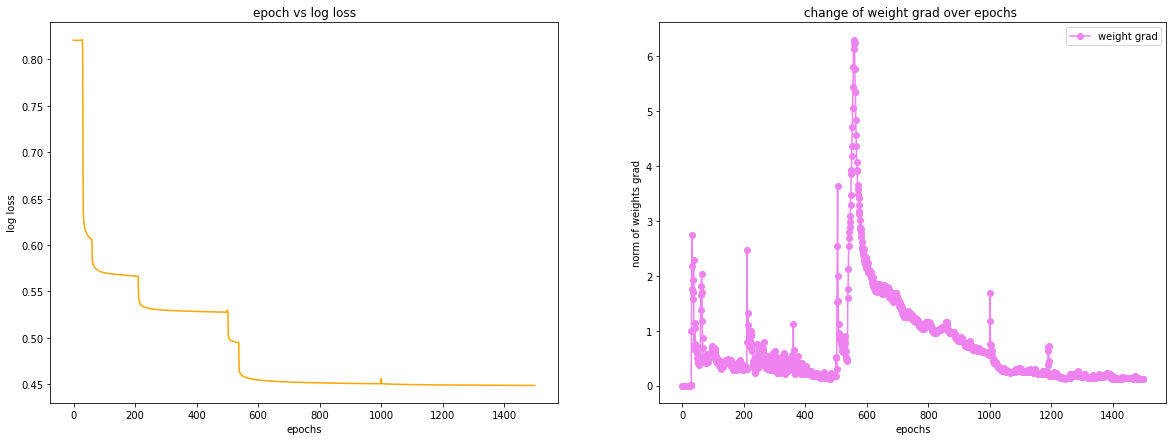

In [120]:
plot(Twgrad1,Tloss1,model1)

In [119]:
print("Loss on test:")
test(model1,test_dl)
print("Training accuracy:")
get_accuracy(train_dl,model1)
print("Test accuracy:")
get_accuracy(test_dl,model1)
print("Training f1 score:")
get_f1(train_dl,model1)
print("Test f1 score:")
get_f1(test_dl,model1)

Loss on test:
1.6382439557243795
Training accuracy:
89.16826844215393 %
Test accuracy:
82.09895491600037 %
Training f1 score:
F1 score: 0.8048780560493469
Test f1 score:
F1 score: 0.7708333134651184


## Tuning the hyperparameter for number of channels:

Increasing the number of channels the performance goes high as the training accuracy goes high.

## BONUS (1.5 + 1.5 points)
- Recall the custom Dataset and DataLoaders exercise from the first assignment? Create a custom data-loading pipeline (i.e. Dataset and Dataloader) to be used with your model. Implement the transform functionality as collate_fn. (0.5 + 1)
- Consider using a pre-trained model as a starting point and fine-tuning it on the SVHN dataset. Briefly contrast the performance with your design choices to justify the gain or loss in performance.

Here are some tutorials for finetuning pre-trained models: https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html & https://huggingface.co/docs/transformers/training

In [ ]:
# Bonus TODO: